# This notebook is to compare the TOM data uploaded directly by Laura on 10/18/2020 and the TOM data obtained from the "coga-inia.wgcna.hub.genes.files.RData"

In [1]:
import sys
sys.path.append("../..")
from sys import platform 
import pandas as pd
from src.eda.eda_functions import scale_free_validate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
old_tom = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

Wall time: 5min 39s


In [5]:
new_tom = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/kapoor_TOM_Apr5.csv', index_col = 0)

In [6]:
old_tom.head()

,ENSG00000227232,ENSG00000237683,ENSG00000241860,ENSG00000228463,ENSG00000225972,ENSG00000225630,ENSG00000237973,ENSG00000229344,ENSG00000248527,ENSG00000198744,...,ENSG00000226555,ENSG00000176728,ENSG00000217896,ENSG00000185275,ENSG00000131002,ENSG00000267793,ENSG00000260197,ENSG00000012817,ENSG00000229236,ENSG00000198692
ENSG00000227232,1.000000,0.000020,0.000030,0.000005,0.000073,3.861530e-05,0.000023,1.242536e-04,0.000057,0.000027,...,3.331294e-06,3.597243e-06,3.057570e-06,0.000014,3.406501e-06,2.426621e-06,2.787483e-06,4.098064e-06,3.525666e-06,3.664547e-06
ENSG00000237683,0.000020,1.000000,0.000502,0.000009,0.000014,4.467564e-06,0.000005,2.258114e-05,0.000017,0.000003,...,2.347299e-06,1.652009e-06,3.248601e-06,0.000005,1.489917e-06,1.919215e-06,1.754257e-06,1.478108e-06,1.977784e-06,1.150159e-06
ENSG00000241860,0.000030,0.000502,1.000000,0.000261,0.000013,8.949508e-06,0.000003,9.220565e-06,0.000011,0.000008,...,8.338342e-06,8.376668e-06,8.015016e-06,0.000009,8.176414e-06,7.759969e-06,8.165011e-06,8.027337e-06,8.343403e-06,8.062646e-06
ENSG00000228463,0.000005,0.000009,0.000261,1.000000,0.000002,3.453618e-07,0.000002,7.867309e-07,0.000001,0.000003,...,2.153623e-04,2.191977e-04,2.016207e-04,0.000004,2.180072e-04,2.042036e-04,2.147238e-04,2.118926e-04,2.172393e-04,2.141004e-04
ENSG00000225972,0.000073,0.000014,0.000013,0.000002,1.000000,5.194191e-03,0.000008,3.568830e-02,0.078554,0.013108,...,6.351416e-07,8.297258e-07,6.014009e-07,0.000006,7.768816e-07,6.322786e-07,6.572636e-07,9.048092e-07,7.631883e-07,9.059659e-07


In [7]:
new_tom.head()

,ENSG00000227232,ENSG00000237683,ENSG00000241860,ENSG00000228463,ENSG00000225972,ENSG00000225630,ENSG00000237973,ENSG00000229344,ENSG00000248527,ENSG00000198744,...,ENSG00000226555,ENSG00000176728,ENSG00000217896,ENSG00000185275,ENSG00000131002,ENSG00000267793,ENSG00000260197,ENSG00000012817,ENSG00000229236,ENSG00000198692
ENSG00000227232,1.000000,0.000020,0.000030,0.000005,0.000073,3.861530e-05,0.000023,1.242536e-04,0.000057,0.000027,...,3.331294e-06,3.597243e-06,3.057570e-06,0.000014,3.406501e-06,2.426621e-06,2.787483e-06,4.098064e-06,3.525666e-06,3.664547e-06
ENSG00000237683,0.000020,1.000000,0.000502,0.000009,0.000014,4.467564e-06,0.000005,2.258114e-05,0.000017,0.000003,...,2.347299e-06,1.652009e-06,3.248601e-06,0.000005,1.489917e-06,1.919215e-06,1.754257e-06,1.478108e-06,1.977784e-06,1.150159e-06
ENSG00000241860,0.000030,0.000502,1.000000,0.000261,0.000013,8.949508e-06,0.000003,9.220565e-06,0.000011,0.000008,...,8.338342e-06,8.376668e-06,8.015016e-06,0.000009,8.176414e-06,7.759969e-06,8.165011e-06,8.027337e-06,8.343403e-06,8.062646e-06
ENSG00000228463,0.000005,0.000009,0.000261,1.000000,0.000002,3.453618e-07,0.000002,7.867309e-07,0.000001,0.000003,...,2.153623e-04,2.191977e-04,2.016207e-04,0.000004,2.180072e-04,2.042036e-04,2.147238e-04,2.118926e-04,2.172393e-04,2.141004e-04
ENSG00000225972,0.000073,0.000014,0.000013,0.000002,1.000000,5.194191e-03,0.000008,3.568830e-02,0.078554,0.013108,...,6.351416e-07,8.297258e-07,6.014009e-07,0.000006,7.768816e-07,6.322786e-07,6.572636e-07,9.048092e-07,7.631883e-07,9.059659e-07


In [8]:
len(new_tom.columns[new_tom.columns == old_tom.columns])

19911

In [16]:
print('The old TOM size is equal to the new TOM size')
sys.getsizeof(old_tom) == sys.getsizeof(new_tom)

The old TOM size is equal to the new TOM size


True

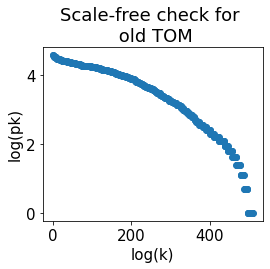

In [14]:
scale_free_validate(old_tom, 'old TOM')

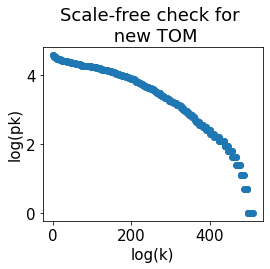

In [13]:
scale_free_validate(new_tom, 'new TOM')

In [18]:
old.iloc[1:10,0] == new_tom.iloc[1:10,0]

ENSG00000237683     True
ENSG00000241860    False
ENSG00000228463     True
ENSG00000225972     True
ENSG00000225630     True
ENSG00000237973    False
ENSG00000229344     True
ENSG00000248527     True
ENSG00000198744     True
Name: ENSG00000227232, dtype: bool

In [19]:
old_tom.iloc[1,0]

2.04943457634286e-05

In [41]:
identical_cnt = 0
for col in old_tom.columns:
    if old_tom[col][round(old_tom[col], 8) == round(new_tom[col], 8)].shape[0] == 19911:
        identical_cnt += 1

In [44]:
print('Out of 19911 genes,', identical_cnt, 'genes have the same edge weights at the 8th decimal point')

Out of 19911 genes, 19911 genes have the same edge weights at the 8th decimal point
